### Import module


In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Plot Params

In [2]:
plt.style.use('seaborn-v0_8-whitegrid') 
params = {
    'figure.figsize': (8, 6),
    'axes.labelsize': 12,
    'figure.titlesize': 16,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'lines.linewidth': 1.5,
    'lines.markersize': 4,
    'legend.fontsize': 11,
    'legend.framealpha': 0.8,
    'legend.loc': 'best',
    'figure.dpi': 120,
    'savefig.dpi': 150,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.5,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.constrained_layout.use': True,
    'text.usetex': True, 
}
plt.rcParams.update(params)

### Input processing

In [3]:
project_name = "RC_freq"

data = np.genfromtxt(f'../input/{project_name}.csv', delimiter=';', skip_header=1)
f_data , Vin_data, Vout_data = data.T[:3]
Vout_data[16:] = Vout_data[16:] / 1000  # Convert to Volts for data past index 16
A_data = Vout_data / Vin_data
for x, y in tuple(zip(f_data, A_data)):
    print(f"f = {x:.2f} Hz, A = {y:.2f}")

f = 500.00 Hz, A = 1.01
f = 1000.00 Hz, A = 0.97
f = 1500.00 Hz, A = 0.95
f = 2000.00 Hz, A = 0.93
f = 2500.00 Hz, A = 0.90
f = 3000.00 Hz, A = 0.87
f = 3500.00 Hz, A = 0.83
f = 4000.00 Hz, A = 0.79
f = 4500.00 Hz, A = 0.75
f = 5000.00 Hz, A = 0.72
f = 5500.00 Hz, A = 0.69
f = 6000.00 Hz, A = 0.66
f = 6500.00 Hz, A = 0.63
f = 7000.00 Hz, A = 0.61
f = 7500.00 Hz, A = 0.57
f = 8000.00 Hz, A = 0.55
f = 27000.00 Hz, A = 0.20
f = 40000.00 Hz, A = 0.14
f = 70000.00 Hz, A = 0.08
f = 97000.00 Hz, A = 0.06
f = 170000.00 Hz, A = 0.03
f = 270000.00 Hz, A = 0.02
f = 430000.00 Hz, A = 0.01
f = 680000.00 Hz, A = 0.01
f = 1000000.00 Hz, A = 0.01
f = 1700000.00 Hz, A = 0.01
f = 2700000.00 Hz, A = 0.01


### Plot Raw Data


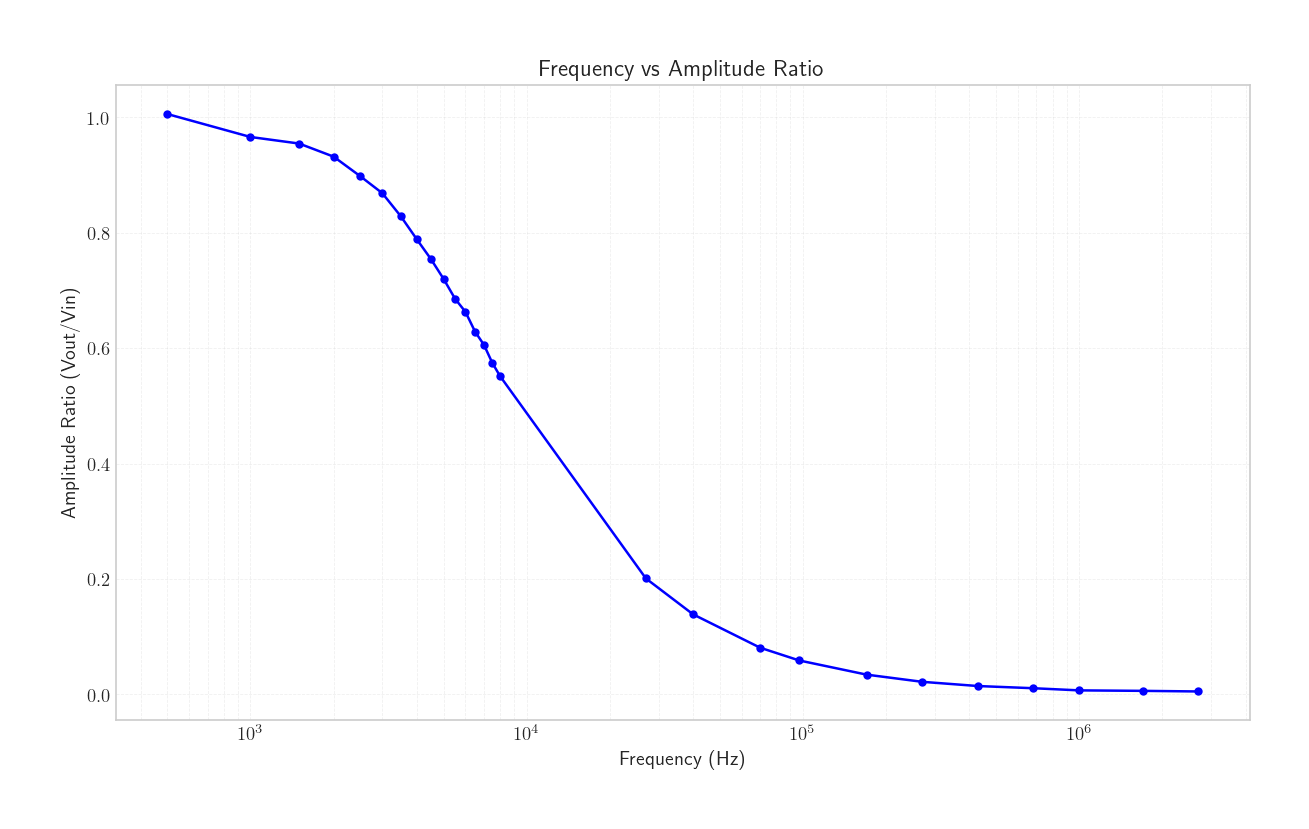

In [8]:
# Plot the data without the red line
plt.figure(figsize=(10, 6))
plt.plot(f_data, A_data, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Ratio (Vout/Vin)')
plt.title('Frequency vs Amplitude Ratio')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.savefig(f'../output/{project_name}_raw_data.png')
plt.show()

